# Hugging Face DiffUsers Research

In [11]:
from diffusers import DiffusionPipeline
from diffusers import EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipeline.to("cuda")

In [13]:
image = pipeline("A photorealistic image of a woman with long flowing hair running through a forest").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

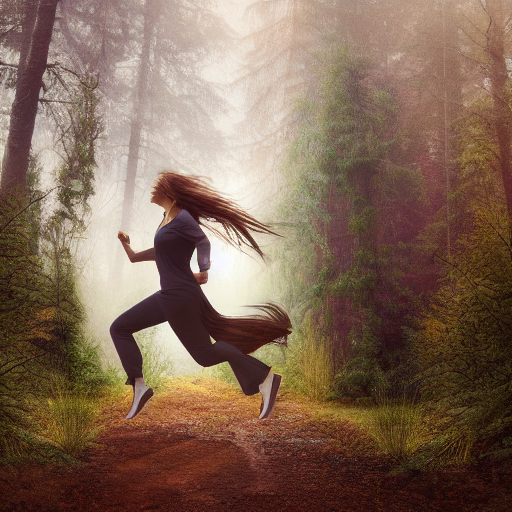

In [14]:
image

# Who doesn't love a cat

In [15]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

In [16]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

In [20]:
# Create a noisy sample
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

In [21]:
# Use a scheduler to go from a noisy sample to a less noisy sample

from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.27.2",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [22]:
# using the scheduler's step method to produce a less noisy image
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [23]:
# A function to display the image after processing

import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [24]:
# Move the model to cuda to go faster

model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

  5%|▍         | 46/1000 [00:00<00:16, 57.57it/s]

'Image at step 50'

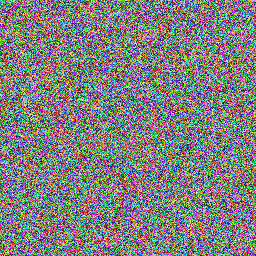

  9%|▉         | 94/1000 [00:01<00:15, 57.69it/s]

'Image at step 100'

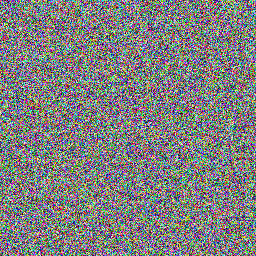

 15%|█▍        | 149/1000 [00:02<00:14, 57.74it/s]

'Image at step 150'

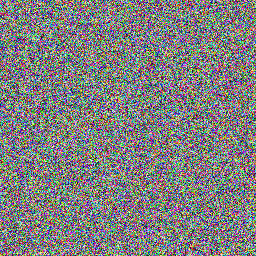

 20%|█▉        | 197/1000 [00:03<00:13, 57.45it/s]

'Image at step 200'

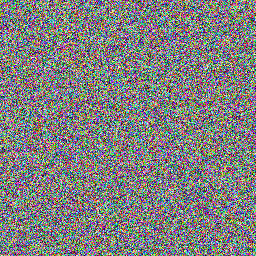

 24%|██▍       | 245/1000 [00:04<00:13, 57.68it/s]

'Image at step 250'

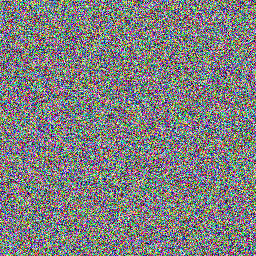

 30%|██▉       | 299/1000 [00:05<00:12, 57.67it/s]

'Image at step 300'

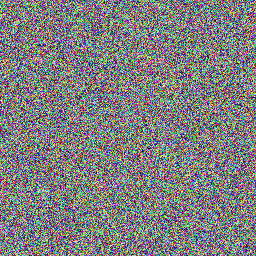

 35%|███▍      | 347/1000 [00:06<00:11, 57.31it/s]

'Image at step 350'

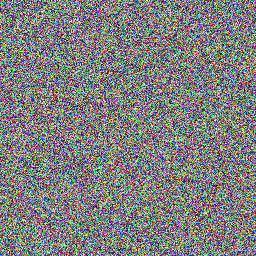

 40%|███▉      | 395/1000 [00:06<00:10, 57.33it/s]

'Image at step 400'

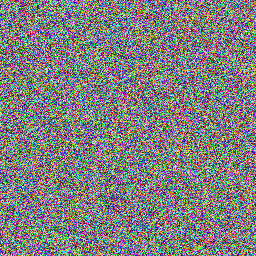

 45%|████▍     | 449/1000 [00:07<00:09, 57.46it/s]

'Image at step 450'

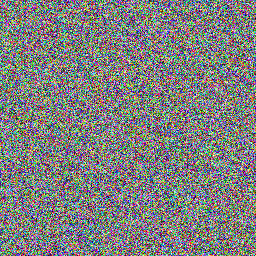

 50%|████▉     | 497/1000 [00:08<00:08, 57.61it/s]

'Image at step 500'

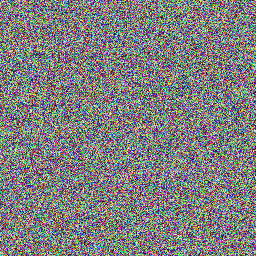

 55%|█████▍    | 545/1000 [00:09<00:07, 57.57it/s]

'Image at step 550'

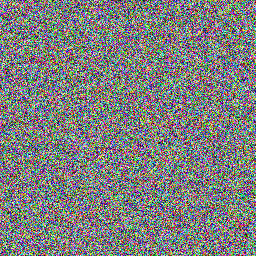

 60%|█████▉    | 599/1000 [00:10<00:06, 57.49it/s]

'Image at step 600'

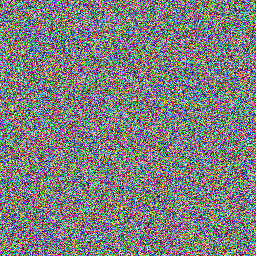

 65%|██████▍   | 647/1000 [00:11<00:06, 57.51it/s]

'Image at step 650'

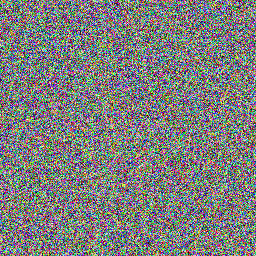

 70%|██████▉   | 695/1000 [00:12<00:05, 57.46it/s]

'Image at step 700'

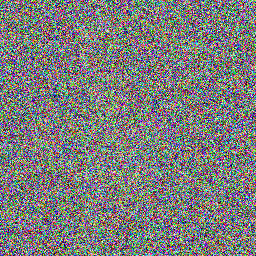

 75%|███████▍  | 749/1000 [00:13<00:04, 57.64it/s]

'Image at step 750'

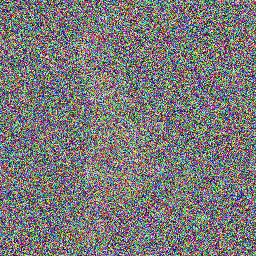

 80%|███████▉  | 797/1000 [00:14<00:03, 57.53it/s]

'Image at step 800'

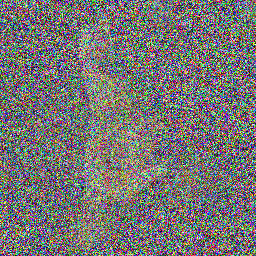

 84%|████████▍ | 845/1000 [00:14<00:02, 57.35it/s]

'Image at step 850'

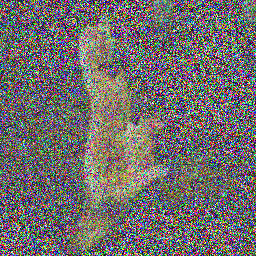

 90%|████████▉ | 899/1000 [00:15<00:01, 57.40it/s]

'Image at step 900'

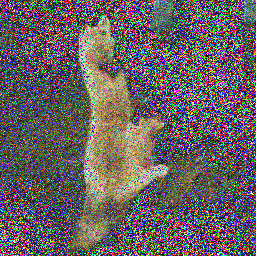

 95%|█████████▍| 947/1000 [00:16<00:00, 57.28it/s]

'Image at step 950'

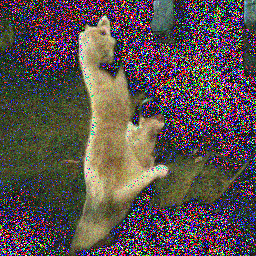

100%|█████████▉| 995/1000 [00:17<00:00, 57.12it/s]

'Image at step 1000'

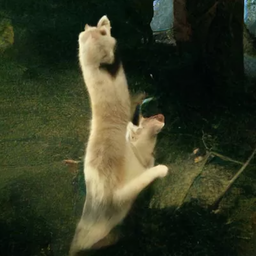

100%|██████████| 1000/1000 [00:17<00:00, 56.64it/s]


In [25]:
# A denoising loop that predicts the residual of the less noisy sample
# computes the less noisy sample using the scheduler

import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)